In [543]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


#sklearn modules for Model Selection--------------------------------------

#from sklearn import svm, tree, linear_model, neighbors
#from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
  

#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

import warnings
warnings.filterwarnings('ignore')


In [544]:
# Import pandas Library
import pandas as pd
import numpy as np

In [545]:
file_path = r"C:\Users\kmalangwasila\Desktop\Personal Documents\University of Bradford\SEMESTER 1 UNIVERSITY OF BRADFORD\Applied AI and DA Capstone Dissertation\Telco_customer_churn 2022.csv"

In [546]:
df = pd.read_csv(file_path)

In [547]:
# Checking the top 5 rows using the dataframe.head() method
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month_to_month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month_to_month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month_to_month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month_to_month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [548]:
# Splitting the columns in three to fit a page view

In [549]:
df.iloc[0:5, 1:15]

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes
1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes
2,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes
3,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes
4,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes


In [550]:
df.iloc[0:5, 15:23]

,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies
0,No,DSL,Yes,Yes,No,No,No,No
1,No,Fiber optic,No,No,No,No,No,No
2,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
3,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
4,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes


In [551]:
df.iloc[0:5, 23:]

,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason
0,Month_to_month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Month_to_month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Month_to_month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,Month_to_month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Month_to_month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [552]:
# Printing the last 5 rows
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month_to_month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [553]:
# Appreciating the Variables in the Columns 
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

# Basic insights of Data Types

In [554]:
# Passing the function to get a quick description of the data thus the total number of rows, each attribute's type and
#the number of nonnull values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior_Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure_Months      7043 non-null   int64  
 14  Phone_Service      7043 non-null   object 
 15  Multiple_Lines     7043 non-null   object 
 16  Internet_Service   7043 

In [555]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn                 object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [556]:
# Checking the number of unique values present in each column
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior_Citizen          2
Partner                 2
Dependents              2
Tenure_Months          73
Phone_Service           2
Multiple_Lines          3
Internet_Service        3
Online_Security         3
Online_Backup           3
Device_Protection       3
Tech_Support            3
Streaming_TV            3
Streaming_Movies        3
Contract                3
Paperless_Billing       2
Payment_Method          4
Monthly_Charges      1585
Total_Charges        6531
Churn                   2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

# Getting a statistical summary of each column , for numeric typed (int, float)

In [557]:
# Summary of each numerical atribute
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


df.describe method reveals that on average customers stay for a period of 32 months and pay 64 dollars, with 1183 dollars CLTV on average.
25% of the customers stay for less than 9months and 75% of customers on average stay less than 55 months

# Pre-processing Stage

## Data Cleaning

In [558]:
#Tasks aimed at getting rid of missing values, reducing noise, inconsistencies, transformations and handling text and categorical data
import pandas as pd
import matplotlib.pylab as plt

In [559]:
df.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month_to_month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month_to_month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [560]:
# Identifying and handling missing values
import numpy as np
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.tail(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month_to_month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [561]:
# Replace "No Internet" with "No"
df = df.replace(["No internet"], "No")
# Replace "No phone service" with "No"
df = df.replace(["No phone service"], "No")
df = df.replace(["No internet service"], "No")

## Identifying missing values using isnull method

The Output is a Boolean Value

In [562]:
missing_data = df.isnull()
missing_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Counting missing values in each column using a for loop in python

In [563]:
for column in missing_data.columns.values.tolist():
    print (column)
    print (missing_data[column].value_counts())
    print("")

CustomerID
False    7043
Name: CustomerID, dtype: int64

Count
False    7043
Name: Count, dtype: int64

Country
False    7043
Name: Country, dtype: int64

State
False    7043
Name: State, dtype: int64

City
False    7043
Name: City, dtype: int64

Zip Code
False    7043
Name: Zip Code, dtype: int64

Lat Long
False    7043
Name: Lat Long, dtype: int64

Latitude
False    7043
Name: Latitude, dtype: int64

Longitude
False    7043
Name: Longitude, dtype: int64

Gender
False    7043
Name: Gender, dtype: int64

Senior_Citizen
False    7043
Name: Senior_Citizen, dtype: int64

Partner
False    7043
Name: Partner, dtype: int64

Dependents
False    7043
Name: Dependents, dtype: int64

Tenure_Months
False    7043
Name: Tenure_Months, dtype: int64

Phone_Service
False    7043
Name: Phone_Service, dtype: int64

Multiple_Lines
False    7043
Name: Multiple_Lines, dtype: int64

Internet_Service
False    7043
Name: Internet_Service, dtype: int64

Online_Security
False    7043
Name: Online_Security, dtyp

In [564]:
# Removing NaN TotalCharges rows
#df= df[~np.isnan(df['Total_Charges'])]

In [565]:
# Exploring the data to check if there are any missing values
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior_Citizen          0
Partner                 0
Dependents              0
Tenure_Months           0
Phone_Service           0
Multiple_Lines          0
Internet_Service        0
Online_Security         0
Online_Backup           0
Device_Protection       0
Tech_Support            0
Streaming_TV            0
Streaming_Movies        0
Contract                0
Paperless_Billing       0
Payment_Method          0
Monthly_Charges         0
Total_Charges           0
Churn                   0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

## There are no missing values except for the 5174 observations who are non-churners hence no Churn Reason is given

In [566]:
# Replacing NaN with the word Non-churner
df.fillna("Non-Churner", inplace = True)

In [567]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,Non-Churner
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,Non-Churner
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,Non-Churner
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month_to_month,Yes,Electronic check,29.60,346.45,No,0,59,2793,Non-Churner
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,Non-Churner


In [568]:
# Deleting Columns we do not need
df.drop(["Count", "Country", "State", "City","Zip Code", "Lat Long", "Latitude", "Longitude"], axis =1, inplace = True)

In [569]:
df.head(3)

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month_to_month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month_to_month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [570]:
df.describe()

,Tenure_Months,Monthly_Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.265370,58.699418,4400.295755
std,24.559481,30.090047,0.441561,21.525131,1183.057152
min,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,55.000000,89.850000,1.000000,75.000000,5380.500000
max,72.000000,118.750000,1.000000,100.000000,6500.000000


## Making sure that we have correct data format

In [571]:
df.dtypes

CustomerID            object
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn                 object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [572]:
df.Total_Charges = df.Total_Charges.replace(" ", 0)
# Change totalcharges type from string to float
df.Total_Charges = df.Total_Charges.astype('float32')

# Grouping Categorrical Variables - Reason for Churn into Push, Pull and Mooring(Inertia) Factors according to PPM Framework

In [573]:
# Appreciating the types of reasons and the Count for each churn reason
df["Churn Reason"].value_counts()

Non-Churner                                  5174
Attitude of support person                    192
Competitor offered higher download speeds     189
Competitor offered more data                  162
Don't know                                    154
Competitor made better offer                  140
Attitude of service provider                  135
Competitor had better devices                 130
Network reliability                           103
Product dissatisfaction                       102
Price too high                                 98
Service dissatisfaction                        89
Lack of self-service on Website                88
Extra data charges                             57
Moved                                          53
Limited range of services                      44
Lack of affordable download/upload speed       44
Long distance charges                          44
Poor expertise of phone support                20
Poor expertise of online support               19


## Dropping the Rows whose Churn Reason is Deceased

In [574]:
# dropping the rows
df.drop([721,927,1030,1236,1442,1545], axis = 0, inplace = True)
df

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,Yes,Mailed check,53.85,108.150002,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month_to_month,Yes,Electronic check,70.70,151.649994,Yes,1,67,2701,Moved
2,9305-CDSKC,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month_to_month,Yes,Electronic check,99.65,820.500000,Yes,1,86,5372,Moved
3,7892-POOKP,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month_to_month,Yes,Electronic check,104.80,3046.050049,Yes,1,84,5003,Moved
4,0280-XJGEX,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month_to_month,Yes,Bank transfer (automatic),103.70,5036.299805,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,No,No,No,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.400024,No,0,45,5306,Non-Churner
7039,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.500000,No,0,59,2140,Non-Churner
7040,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.899902,No,0,71,5560,Non-Churner
7041,4801-JZAZL,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month_to_month,Yes,Electronic check,29.60,346.450012,No,0,59,2793,Non-Churner


## Mapping the Churn Reasons to PPM Factors

In [575]:
Mapped = {'Price too high':"Push Factors",
          'Product dissatisfaction':"Push Factors",
          'Service dissatisfaction':"Push Factors",
          'Lack of self-service on Website':"Push Factors",
          'Limited range of services':"Push Factors",
          'Long distance charges':"Push Factors",
          'Extra data charges':"Push Factors",
          'Network reliability':"Push Factors",
          'Poor expertise of online support':"Push Factors",
          'Poor expertise of phone support': "Push Factors",
          'Lack of affordable download/upload speed':"Push Factors",
          'Attitude of service provider':"Push Factors",
          'Attitude of support person':'Push Factors', 
          'Competitor had better devices':"Pull Factors",
          'Competitor offered higher download speeds':"Pull Factors",
          'Competitor made better offer':"Pull Factors",
          'Competitor offered more data':'Pull Factors',
          'Moved':"Mooring Factors",
          "Don't know":'Mooring Factors'}

In [576]:
df1 = df["Churn Reason"].map(Mapped)

In [577]:
df1.iloc[1230:1240]

1233       Push Factors
1234       Push Factors
1235       Push Factors
1237    Mooring Factors
1238    Mooring Factors
1239    Mooring Factors
1240       Pull Factors
1241    Mooring Factors
1242       Pull Factors
1243       Pull Factors
Name: Churn Reason, dtype: object

In [578]:
#Customer_Churn = df.insert(25,"PPM_Factors",df1)

In [584]:
df.iloc[15:20]

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason,PPM_Factors
15,9420-LOJKX,Female,No,No,Yes,15,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month_to_month,Yes,Credit card (automatic),99.10,1426.400024,Yes,1,82,2966,Competitor offered more data,Pull Factors
16,7495-OOKFY,Female,Yes,Yes,Yes,8,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month_to_month,Yes,Credit card (automatic),80.65,633.299988,Yes,1,69,5302,Competitor made better offer,Pull Factors
17,1658-BYGOY,Male,Yes,No,Yes,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month_to_month,Yes,Electronic check,95.45,1752.550049,Yes,1,81,3179,Competitor made better offer,Pull Factors
18,5698-BQJOH,Female,No,No,Yes,9,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month_to_month,No,Electronic check,94.40,857.250000,Yes,1,96,5571,Price too high,Push Factors
19,5919-TMRGD,Female,No,No,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month_to_month,Yes,Electronic check,79.35,79.349998,Yes,1,87,2483,Product dissatisfaction,Push Factors


## Counting Unique values in Categorical Features

In [585]:
df["Payment_Method"].value_counts()

Electronic check             2359
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Payment_Method, dtype: int64

In [589]:
df["Contract"].value_counts()

Month_to_month    3869
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [590]:
df["Multiple_Lines"].value_counts()

No     4068
Yes    2969
Name: Multiple_Lines, dtype: int64

In [591]:
df["PPM_Factors"].value_counts()

Push Factors       1035
Pull Factors        621
Mooring Factors     207
Name: PPM_Factors, dtype: int64

## Checking Distribution of Target Variable

Here we have class imbalance

In [592]:
df["Churn"].value_counts()

No     5174
Yes    1863
Name: Churn, dtype: int64

## Binning

## Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis

# 1.Tenure Months
## Lets plot the histogram of Tenure months, to appreciate what the distribution of Tenure Months looks like

In [593]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Tenure Months bins')

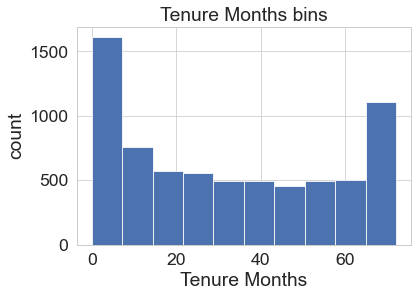

In [594]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Tenure_Months"])

# set x/y labels and plot title
fig = plt.figure
plt.pyplot.xlabel("Tenure Months")
plt.pyplot.ylabel("count")
plt.pyplot.title("Tenure Months bins")

In [595]:
# Building 3 bins of equal length
bins = np.linspace(min(df["Tenure_Months"]), max(df["Tenure_Months"]), 4)
bins

array([ 0., 24., 48., 72.])

In [596]:
# Assigning group names to Tenure
group_names = ['Short_Tenure', 'Medium_Tenure', 'Long_Tenure']

In [597]:
# Employ the function of "cut" the determine what each value of "df['Tenure Months']" belongs to.
df['Tenure_Months_binned'] = pd.cut(df['Tenure_Months'], bins, labels=group_names, include_lowest=True )
df[['Tenure_Months','Tenure_Months_binned']].head(20)

,Tenure_Months,Tenure_Months_binned
0,2,Short_Tenure
1,2,Short_Tenure
2,8,Short_Tenure
3,28,Medium_Tenure
4,49,Long_Tenure
5,10,Short_Tenure
6,1,Short_Tenure
7,1,Short_Tenure
8,47,Medium_Tenure
9,1,Short_Tenure


In [598]:
#Lets see the number of Customers present in each bin.
df["Tenure_Months_binned"].value_counts()

Short_Tenure     3204
Long_Tenure      2239
Medium_Tenure    1594
Name: Tenure_Months_binned, dtype: int64

Text(0.5, 1.0, 'Tenure Months bins')

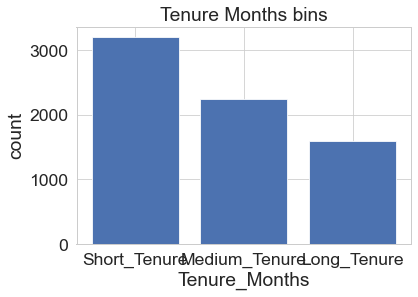

In [599]:
# Plotting the distribution for each bin
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Tenure_Months_binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Tenure_Months")
plt.pyplot.ylabel("count")
plt.pyplot.title("Tenure Months bins")

In [600]:
# Bins Visualisation for Tenure Months

Text(0.5, 1.0, 'Tenure Months bins')

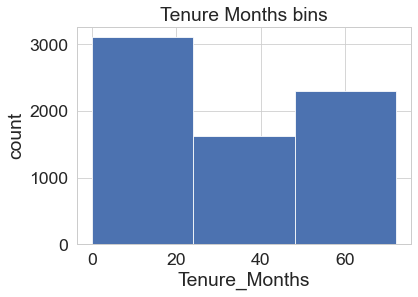

In [601]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["Tenure_Months"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("Tenure_Months")
plt.pyplot.ylabel("count")
plt.pyplot.title("Tenure Months bins")

In [602]:
df.dtypes

CustomerID                object
Gender                    object
Senior_Citizen            object
Partner                   object
Dependents                object
Tenure_Months              int64
Phone_Service             object
Multiple_Lines            object
Internet_Service          object
Online_Security           object
Online_Backup             object
Device_Protection         object
Tech_Support              object
Streaming_TV              object
Streaming_Movies          object
Contract                  object
Paperless_Billing         object
Payment_Method            object
Monthly_Charges          float64
Total_Charges            float32
Churn                     object
Churn Value                int64
Churn Score                int64
CLTV                       int64
Churn Reason              object
PPM_Factors               object
Tenure_Months_binned    category
dtype: object

In [603]:
df.head()

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason,PPM_Factors,Tenure_Months_binned
0,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,Yes,Mailed check,53.85,108.150002,Yes,1,86,3239,Competitor made better offer,Pull Factors,Short_Tenure
1,9237-HQITU,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month_to_month,Yes,Electronic check,70.70,151.649994,Yes,1,67,2701,Moved,Mooring Factors,Short_Tenure
2,9305-CDSKC,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month_to_month,Yes,Electronic check,99.65,820.500000,Yes,1,86,5372,Moved,Mooring Factors,Short_Tenure
3,7892-POOKP,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month_to_month,Yes,Electronic check,104.80,3046.050049,Yes,1,84,5003,Moved,Mooring Factors,Medium_Tenure
4,0280-XJGEX,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month_to_month,Yes,Bank transfer (automatic),103.70,5036.299805,Yes,1,89,5340,Competitor had better devices,Pull Factors,Long_Tenure


In [606]:
#df.to_csv('Clean_Customer_Churn_df.csv')

## A quick visualisations to understand the data further

In [612]:
%%capture
! pip install seaborn

In [613]:
import matplotlib.pyplot as plt
plt.rc("font", size = 100)
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)
import warnings
warnings.filterwarnings('ignore')

Churn distribution

No     73.53
Yes    26.47
Name: Churn, dtype: float64


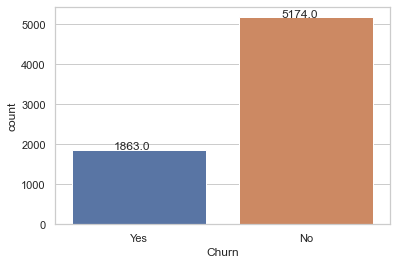

In [614]:
ax = sns.countplot(x = "Churn", data = df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))
print("Churn distribution\n")
print(round(df["Churn"].value_counts()/df.shape[0]*100,2))

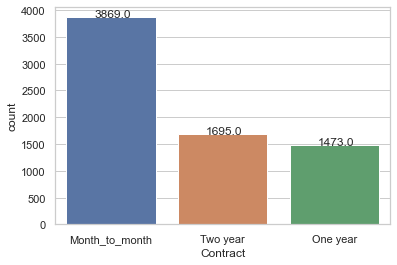

Contract distribution

Month_to_month    54.981
Two year          24.087
One year          20.932
Name: Contract, dtype: float64


In [615]:
ax = sns.countplot(x = "Contract", data = df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))

plt.show()
print("Contract distribution\n")
print(round(df["Contract"].value_counts()/df.shape[0]*100,3))

Text(0, 0.5, 'No of Churn')

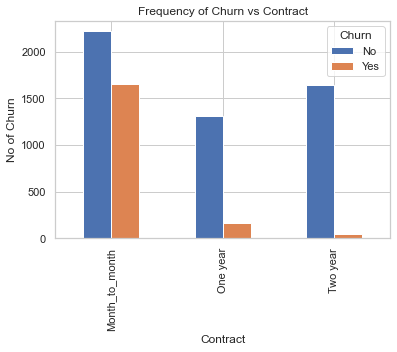

In [611]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("font", size = 100)
pd.crosstab(df.Contract, df.Churn).plot(kind = "bar")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))
plt.title("Frequency of Churn vs Contract")
plt.xlabel("Contract")
plt.ylabel("No of Churn")

Text(0, 0.5, 'No of Churn')

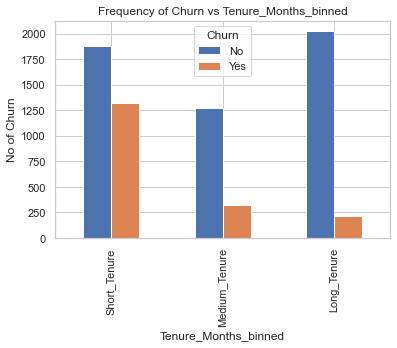

In [616]:
plt.rc("font", size = 100)
pd.crosstab(df.Tenure_Months_binned, df.Churn).plot(kind = "bar")
plt.title("Frequency of Churn vs Tenure_Months_binned")
plt.xlabel("Tenure_Months_binned")
plt.ylabel("No of Churn")

Payment_Method distribution

Electronic check             33.5228
Mailed check                 22.9075
Bank transfer (automatic)    21.9412
Credit card (automatic)      21.6285
Name: Payment_Method, dtype: float64


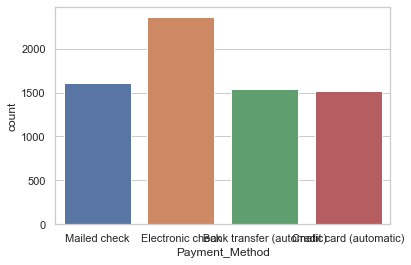

In [617]:
ax = sns.countplot(x = "Payment_Method", data = df)
print("Payment_Method distribution\n")
print(round(df["Payment_Method"].value_counts()/df.shape[0]*100,4))

Text(0, 0.5, 'No of Churn')

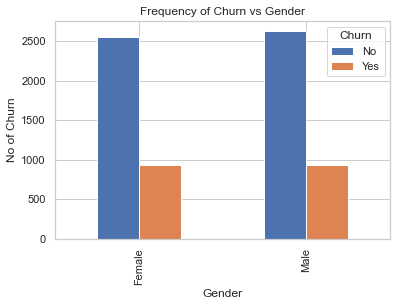

In [618]:
%matplotlib inline
plt.rc("font", size = 100)
pd.crosstab(df.Gender, df.Churn).plot(kind = "bar")
plt.title("Frequency of Churn vs Gender")
plt.xlabel("Gender")
plt.ylabel("No of Churn")

In [619]:
df.head(3)

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason,PPM_Factors,Tenure_Months_binned
0,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,Yes,Mailed check,53.85,108.150002,Yes,1,86,3239,Competitor made better offer,Pull Factors,Short_Tenure
1,9237-HQITU,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month_to_month,Yes,Electronic check,70.70,151.649994,Yes,1,67,2701,Moved,Mooring Factors,Short_Tenure
2,9305-CDSKC,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month_to_month,Yes,Electronic check,99.65,820.500000,Yes,1,86,5372,Moved,Mooring Factors,Short_Tenure


Dependents distribution

No     76.8794
Yes    23.1206
Name: Dependents, dtype: float64


Text(0, 0.5, 'No of Churn')

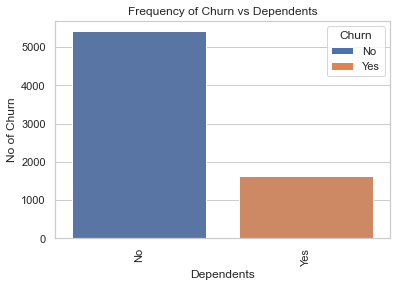

In [620]:
%matplotlib inline
plt.rc("font", size = 100)
pd.crosstab(df.Dependents, df.Churn).plot(kind = "bar")
ax = sns.countplot(x = "Dependents", data = df)
print("Dependents distribution\n")
print(round(df["Dependents"].value_counts()/df.shape[0]*100,4))
plt.title("Frequency of Churn vs Dependents")
plt.xlabel("Dependents")
plt.ylabel("No of Churn")

Partner distribution

No     51.684
Yes    48.316
Name: Partner, dtype: float64


Text(0, 0.5, 'No of Churn')

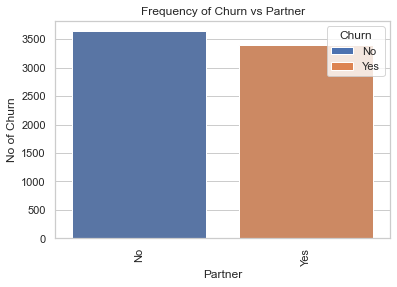

In [621]:
%matplotlib inline
plt.rc("font", size = 100)
pd.crosstab(df.Partner, df.Churn).plot(kind = "bar")
ax = sns.countplot(x = "Partner", data = df)
print("Partner distribution\n")
print(round(df["Partner"].value_counts()/df.shape[0]*100,4))
plt.title("Frequency of Churn vs Partner")
plt.xlabel("Partner")
plt.ylabel("No of Churn")

Text(0, 0.5, 'No of Churn')

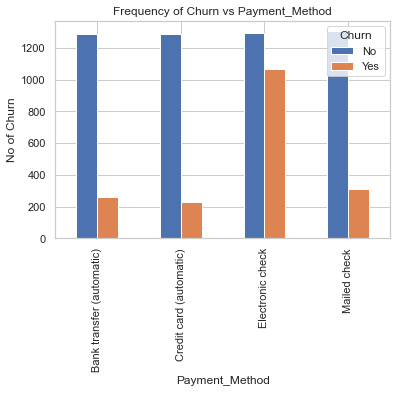

In [622]:
%matplotlib inline
plt.rc("font", size = 100)
pd.crosstab(df.Payment_Method, df.Churn).plot(kind = "bar")
plt.title("Frequency of Churn vs Payment_Method")
plt.xlabel("Payment_Method")
plt.ylabel("No of Churn")

Text(0, 0.5, 'No of Churn')

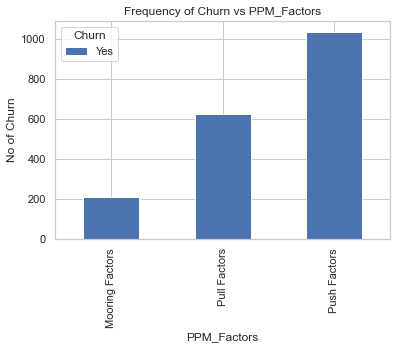

In [623]:
%matplotlib inline
plt.rc("font", size = 100)
pd.crosstab(df.PPM_Factors, df.Churn).plot(kind = "bar")
plt.title("Frequency of Churn vs PPM_Factors")
plt.xlabel("PPM_Factors")
plt.ylabel("No of Churn")

Senior_Citizen distribution

No     83.7999
Yes    16.2001
Name: Senior_Citizen, dtype: float64


Text(0, 0.5, 'No of Churn')

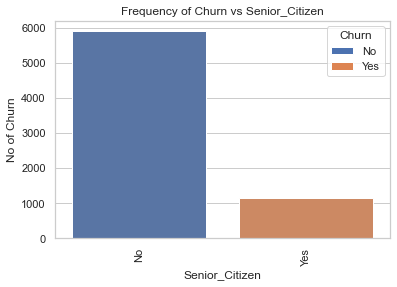

In [624]:
%matplotlib inline
plt.rc("font", size = 14)
pd.crosstab(df.Senior_Citizen, df.Churn).plot(kind = "bar")
ax = sns.countplot(x = "Senior_Citizen", data = df)
print("Senior_Citizen distribution\n")
print(round(df["Senior_Citizen"].value_counts()/df.shape[0]*100,4))
plt.title("Frequency of Churn vs Senior_Citizen")
plt.xlabel("Senior_Citizen")
plt.ylabel("No of Churn")

Text(0, 0.5, 'No of Churn')

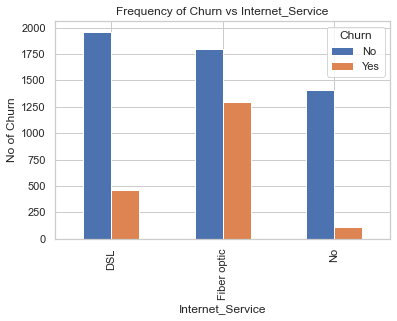

In [625]:
%matplotlib inline
plt.rc("font", size = 14)
pd.crosstab(df.Internet_Service, df.Churn).plot(kind = "bar")
plt.title("Frequency of Churn vs Internet_Service")
plt.xlabel("Internet_Service")
plt.ylabel("No of Churn")

Text(0, 0.5, 'No of Churn')

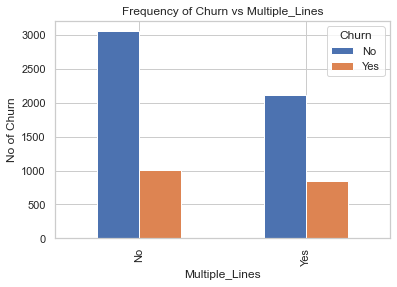

In [626]:
%matplotlib inline
plt.rc("font", size = 14)
pd.crosstab(df.Multiple_Lines, df.Churn).plot(kind = "bar")
plt.title("Frequency of Churn vs Multiple_Lines")
plt.xlabel("Multiple_Lines")
plt.ylabel("No of Churn")

Text(0, 0.5, 'No of Churn')

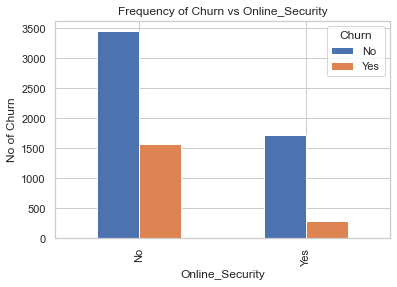

In [627]:
%matplotlib inline
plt.rc("font", size = 14)
pd.crosstab(df.Online_Security, df.Churn).plot(kind = "bar")
plt.title("Frequency of Churn vs Online_Security")
plt.xlabel("Online_Security")
plt.ylabel("No of Churn")

Text(0, 0.5, 'No of Churn')

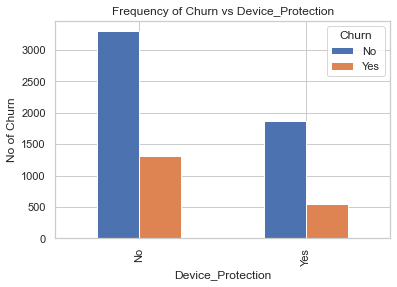

In [628]:
%matplotlib inline
plt.rc("font", size = 14)
pd.crosstab(df.Device_Protection, df.Churn).plot(kind = "bar")
plt.title("Frequency of Churn vs Device_Protection")
plt.xlabel("Device_Protection")
plt.ylabel("No of Churn")

Text(0, 0.5, 'No of Churn')

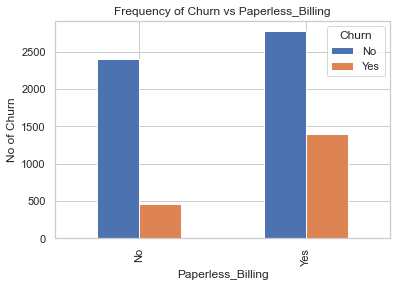

In [629]:
%matplotlib inline
plt.rc("font", size = 14)
pd.crosstab(df.Paperless_Billing, df.Churn).plot(kind = "bar")
plt.title("Frequency of Churn vs Paperless_Billing")
plt.xlabel("Paperless_Billing")
plt.ylabel("No of Churn")

In [630]:
def plot_target_dist(df):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    
    fig = plt.figure(figsize = (20, 10))
    plt.subplot(121)
    plt.pie(df.Churn.value_counts(),labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
    plt.title('Churn Outcome Pie Chart', fontsize = 30, fontweight = 'bold')
    plt.subplot(122)
    t = sns.countplot(df.Churn)
    t.set_xlabel('Churn', fontweight = 'bold', fontsize = 20)
    t.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    plt.title('Churn Outcome Distributions', fontsize = 30, fontweight = 'bold')
    plt.tight_layout()

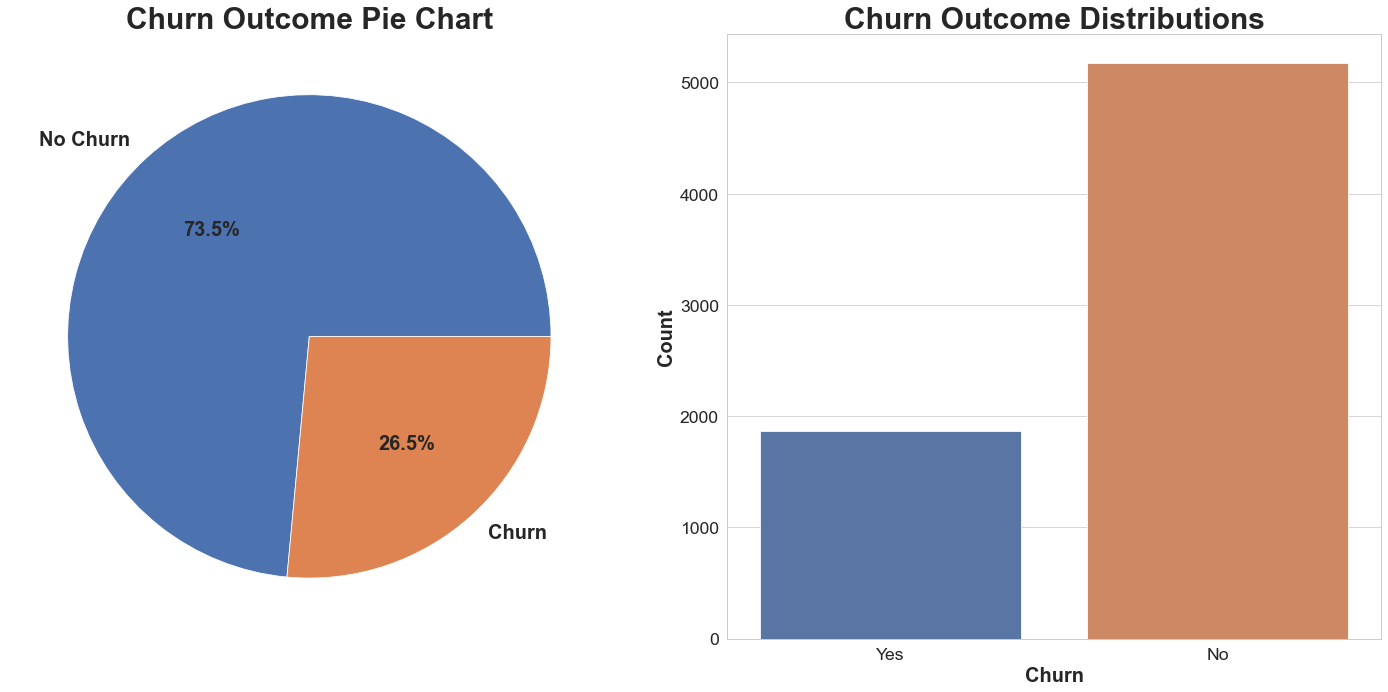

In [631]:
plot_target_dist(df)

In [632]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

In [633]:
def plot_kde(df, feature):
    plt.figure(figsize = (15, 5))
    plt.title(f"KDE Plot: {feature}", fontsize = 30, fontweight = 'bold')
    ax = sns.kdeplot(df[df.Churn == 'No'][feature].dropna(), label = 'No Churn', lw = 2, legend = True)
    plt.legend = True
    ax1 = sns.kdeplot(df[df.Churn == 'Yes'][feature].dropna(), label = 'Churn', lw = 2, legend = True)
    if feature == 'Tenure_Months':
        plt.xlabel('Tenure_Months', fontsize = 20, fontweight = 'bold')
    else:
        plt.xlabel('Charge $', fontsize = 20, fontweight = 'bold')
    
    plt.tight_layout()
    ax.legend()
    ax1.legend()

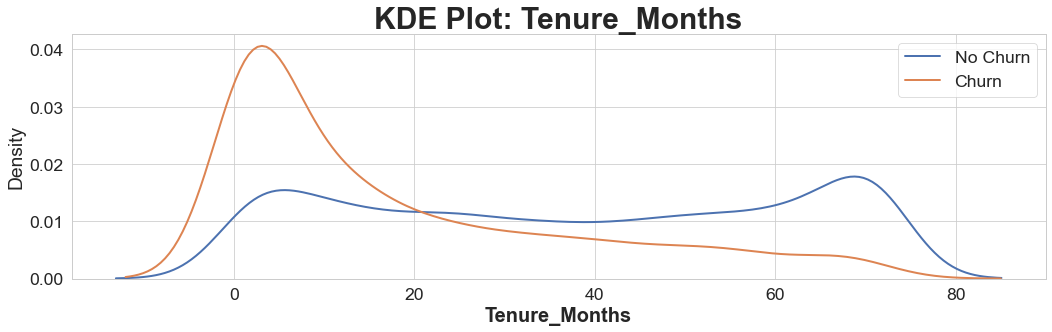

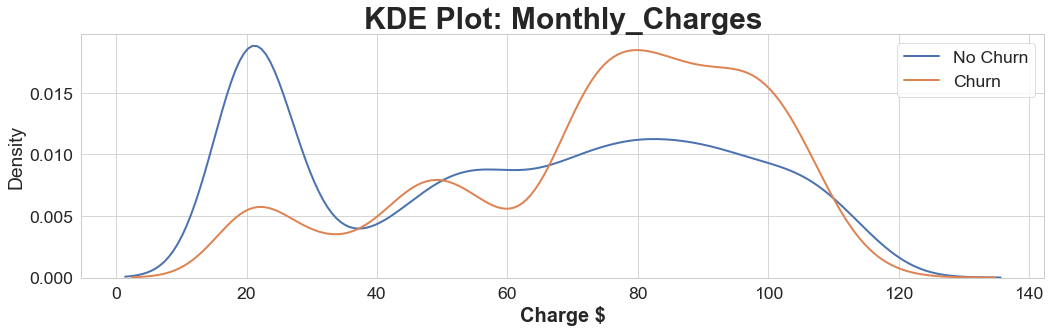

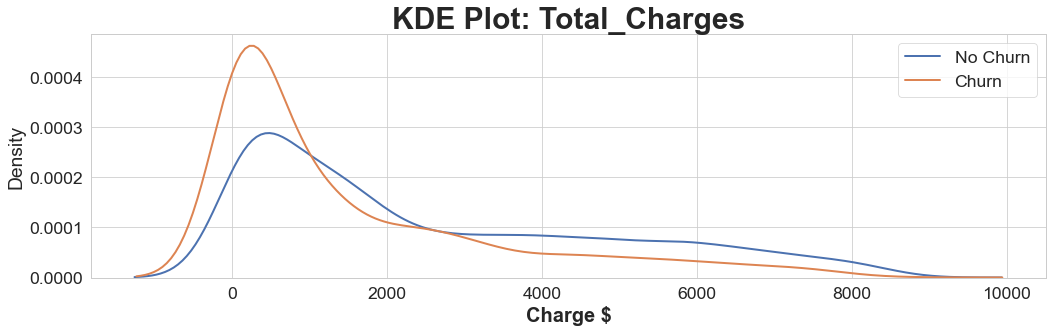

In [634]:
plot_kde(df, 'Tenure_Months')
plot_kde(df, 'Monthly_Charges')
plot_kde(df, 'Total_Charges')

Subscribers whose tenure is less than a year are more likely to leave

more likely to have more than $65 monthly charges


In [635]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
import matplotlib.gridspec as gridspec

In [636]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preparing the Data for Machine Learning Algorithms

In [637]:
#Converting some binary variables (Yes/No) to 0 and 1
# List of variables to map
varlist = ['Senior_Citizen', 'Phone_Service', 'Paperless_Billing', 'Churn', 'Partner', 'Dependents']

Binary Coding for these variables with two values

In [638]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

Using OneHotEncoder

In [639]:
# Applying the function to the var list
df[varlist] = df[varlist].apply(binary_map)
df.head()

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason,PPM_Factors,Tenure_Months_binned
0,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,1,Mailed check,53.85,108.150002,1,1,86,3239,Competitor made better offer,Pull Factors,Short_Tenure
1,9237-HQITU,Female,0,0,1,2,1,No,Fiber optic,No,No,No,No,No,No,Month_to_month,1,Electronic check,70.70,151.649994,1,1,67,2701,Moved,Mooring Factors,Short_Tenure
2,9305-CDSKC,Female,0,0,1,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month_to_month,1,Electronic check,99.65,820.500000,1,1,86,5372,Moved,Mooring Factors,Short_Tenure
3,7892-POOKP,Female,0,1,1,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month_to_month,1,Electronic check,104.80,3046.050049,1,1,84,5003,Moved,Mooring Factors,Medium_Tenure
4,0280-XJGEX,Male,0,0,1,49,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month_to_month,1,Bank transfer (automatic),103.70,5036.299805,1,1,89,5340,Competitor had better devices,Pull Factors,Long_Tenure


In [640]:
# Treatment of Categorical Variables with more than one values together with Gender and Internet Service

In [641]:
#For categorical variables with multiple levels, create dummy features (one-hot encoded)
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Payment_Method','Internet_Service', 'Device_Protection', 'Tech_Support', 'Multiple_Lines', 'Online_Backup', 'Online_Security', 'Streaming_TV', 'Streaming_Movies']], drop_first=True)

# Adding the results to the main dataframe (Concancate Function)
df = pd.concat([df, dummy1], axis = 1)
df.head()

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason,PPM_Factors,Tenure_Months_binned,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Internet_Service_Fiber optic,Internet_Service_No,Device_Protection_Yes,Tech_Support_Yes,Multiple_Lines_Yes,Online_Backup_Yes,Online_Security_Yes,Streaming_TV_Yes,Streaming_Movies_Yes
0,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,1,Mailed check,53.85,108.150002,1,1,86,3239,Competitor made better offer,Pull Factors,Short_Tenure,0,0,1,0,0,0,0,0,1,1,0,0
1,9237-HQITU,Female,0,0,1,2,1,No,Fiber optic,No,No,No,No,No,No,Month_to_month,1,Electronic check,70.70,151.649994,1,1,67,2701,Moved,Mooring Factors,Short_Tenure,0,1,0,1,0,0,0,0,0,0,0,0
2,9305-CDSKC,Female,0,0,1,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month_to_month,1,Electronic check,99.65,820.500000,1,1,86,5372,Moved,Mooring Factors,Short_Tenure,0,1,0,1,0,1,0,1,0,0,1,1
3,7892-POOKP,Female,0,1,1,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month_to_month,1,Electronic check,104.80,3046.050049,1,1,84,5003,Moved,Mooring Factors,Medium_Tenure,0,1,0,1,0,1,1,1,0,0,1,1
4,0280-XJGEX,Male,0,0,1,49,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month_to_month,1,Bank transfer (automatic),103.70,5036.299805,1,1,89,5340,Competitor had better devices,Pull Factors,Long_Tenure,0,0,0,1,0,1,0,1,1,0,1,1


In [642]:
dummy2 = pd.get_dummies(df[['Contract', 'Gender']])
dummy2.head()

,Contract_Month_to_month,Contract_One year,Contract_Two year,Gender_Female,Gender_Male
0,1,0,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,1,0,0,0,1


In [643]:
# Adding the results to the main dataframe (Concancate Function)
df = pd.concat([df, dummy2], axis = 1)
df.head()

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason,PPM_Factors,Tenure_Months_binned,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Internet_Service_Fiber optic,Internet_Service_No,Device_Protection_Yes,Tech_Support_Yes,Multiple_Lines_Yes,Online_Backup_Yes,Online_Security_Yes,Streaming_TV_Yes,Streaming_Movies_Yes,Contract_Month_to_month,Contract_One year,Contract_Two year,Gender_Female,Gender_Male
0,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month_to_month,1,Mailed check,53.85,108.150002,1,1,86,3239,Competitor made better offer,Pull Factors,Short_Tenure,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1
1,9237-HQITU,Female,0,0,1,2,1,No,Fiber optic,No,No,No,No,No,No,Month_to_month,1,Electronic check,70.70,151.649994,1,1,67,2701,Moved,Mooring Factors,Short_Tenure,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,9305-CDSKC,Female,0,0,1,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month_to_month,1,Electronic check,99.65,820.500000,1,1,86,5372,Moved,Mooring Factors,Short_Tenure,0,1,0,1,0,1,0,1,0,0,1,1,1,0,0,1,0
3,7892-POOKP,Female,0,1,1,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month_to_month,1,Electronic check,104.80,3046.050049,1,1,84,5003,Moved,Mooring Factors,Medium_Tenure,0,1,0,1,0,1,1,1,0,0,1,1,1,0,0,1,0
4,0280-XJGEX,Male,0,0,1,49,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month_to_month,1,Bank transfer (automatic),103.70,5036.299805,1,1,89,5340,Competitor had better devices,Pull Factors,Long_Tenure,0,0,0,1,0,1,0,1,1,0,1,1,1,0,0,0,1


In [644]:
# We have created dummies for the below variables, so we can drop them

In [645]:
df = df.drop(['Payment_Method','Gender','Multiple_Lines','Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection',
       'Tech_Support', 'Streaming_TV', 'Streaming_Movies'], 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7037 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   CustomerID                              7037 non-null   object  
 1   Senior_Citizen                          7037 non-null   int64   
 2   Partner                                 7037 non-null   int64   
 3   Dependents                              7037 non-null   int64   
 4   Tenure_Months                           7037 non-null   int64   
 5   Phone_Service                           7037 non-null   int64   
 6   Contract                                7037 non-null   object  
 7   Paperless_Billing                       7037 non-null   int64   
 8   Monthly_Charges                         7037 non-null   float64 
 9   Total_Charges                           7037 non-null   float32 
 10  Churn                                   7037 non

In [646]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7037 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   CustomerID                              7037 non-null   object  
 1   Senior_Citizen                          7037 non-null   int64   
 2   Partner                                 7037 non-null   int64   
 3   Dependents                              7037 non-null   int64   
 4   Tenure_Months                           7037 non-null   int64   
 5   Phone_Service                           7037 non-null   int64   
 6   Contract                                7037 non-null   object  
 7   Paperless_Billing                       7037 non-null   int64   
 8   Monthly_Charges                         7037 non-null   float64 
 9   Total_Charges                           7037 non-null   float32 
 10  Churn                                   7037 non

In [647]:
df["Streaming_TV_Yes"].value_counts()

0    4331
1    2706
Name: Streaming_TV_Yes, dtype: int64

In [648]:
df.head()

,CustomerID,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason,PPM_Factors,Tenure_Months_binned,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Internet_Service_Fiber optic,Internet_Service_No,Device_Protection_Yes,Tech_Support_Yes,Multiple_Lines_Yes,Online_Backup_Yes,Online_Security_Yes,Streaming_TV_Yes,Streaming_Movies_Yes,Contract_Month_to_month,Contract_One year,Contract_Two year,Gender_Female,Gender_Male
0,3668-QPYBK,0,0,0,2,1,Month_to_month,1,53.85,108.150002,1,1,86,3239,Competitor made better offer,Pull Factors,Short_Tenure,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1
1,9237-HQITU,0,0,1,2,1,Month_to_month,1,70.70,151.649994,1,1,67,2701,Moved,Mooring Factors,Short_Tenure,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,9305-CDSKC,0,0,1,8,1,Month_to_month,1,99.65,820.500000,1,1,86,5372,Moved,Mooring Factors,Short_Tenure,0,1,0,1,0,1,0,1,0,0,1,1,1,0,0,1,0
3,7892-POOKP,0,1,1,28,1,Month_to_month,1,104.80,3046.050049,1,1,84,5003,Moved,Mooring Factors,Medium_Tenure,0,1,0,1,0,1,1,1,0,0,1,1,1,0,0,1,0
4,0280-XJGEX,0,0,1,49,1,Month_to_month,1,103.70,5036.299805,1,1,89,5340,Competitor had better devices,Pull Factors,Long_Tenure,0,0,0,1,0,1,0,1,1,0,1,1,1,0,0,0,1


In [649]:
import matplotlib.gridspec as gs
from sklearn.model_selection import GridSearchCV

%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [650]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

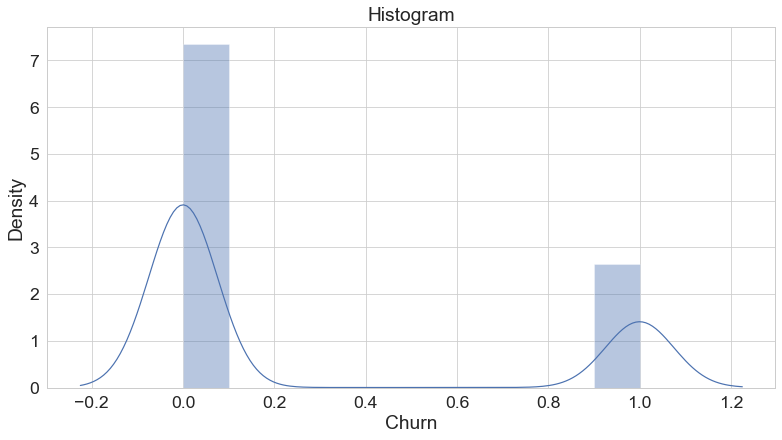

In [651]:
fig = plt.figure(constrained_layout=True, figsize=(16,6))
grid = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Histogram')
sns.distplot(df.loc[:,"Churn"], norm_hist=True, ax = ax1)
plt.show()

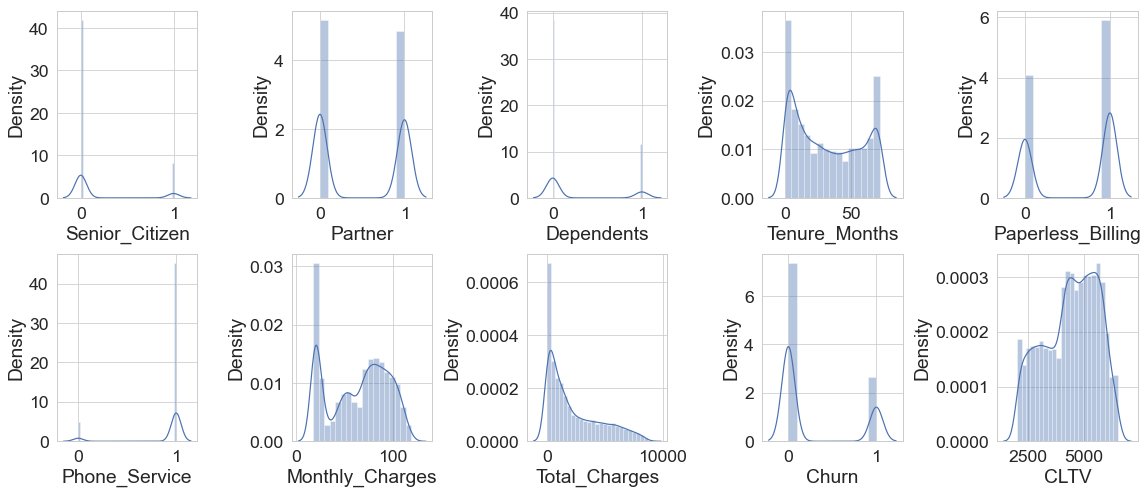

In [652]:
fig = plt.figure(figsize=(16,30))
features= ["Senior_Citizen", "Partner", "Dependents", "Tenure_Months", "Paperless_Billing", "Phone_Service", "Monthly_Charges", "Total_Charges", "Churn", "CLTV"]
           
for i in range(len(features)):
    fig.add_subplot(9, 5, i+1)
    sns.distplot(df[features[i]])
plt.tight_layout()
plt.show()

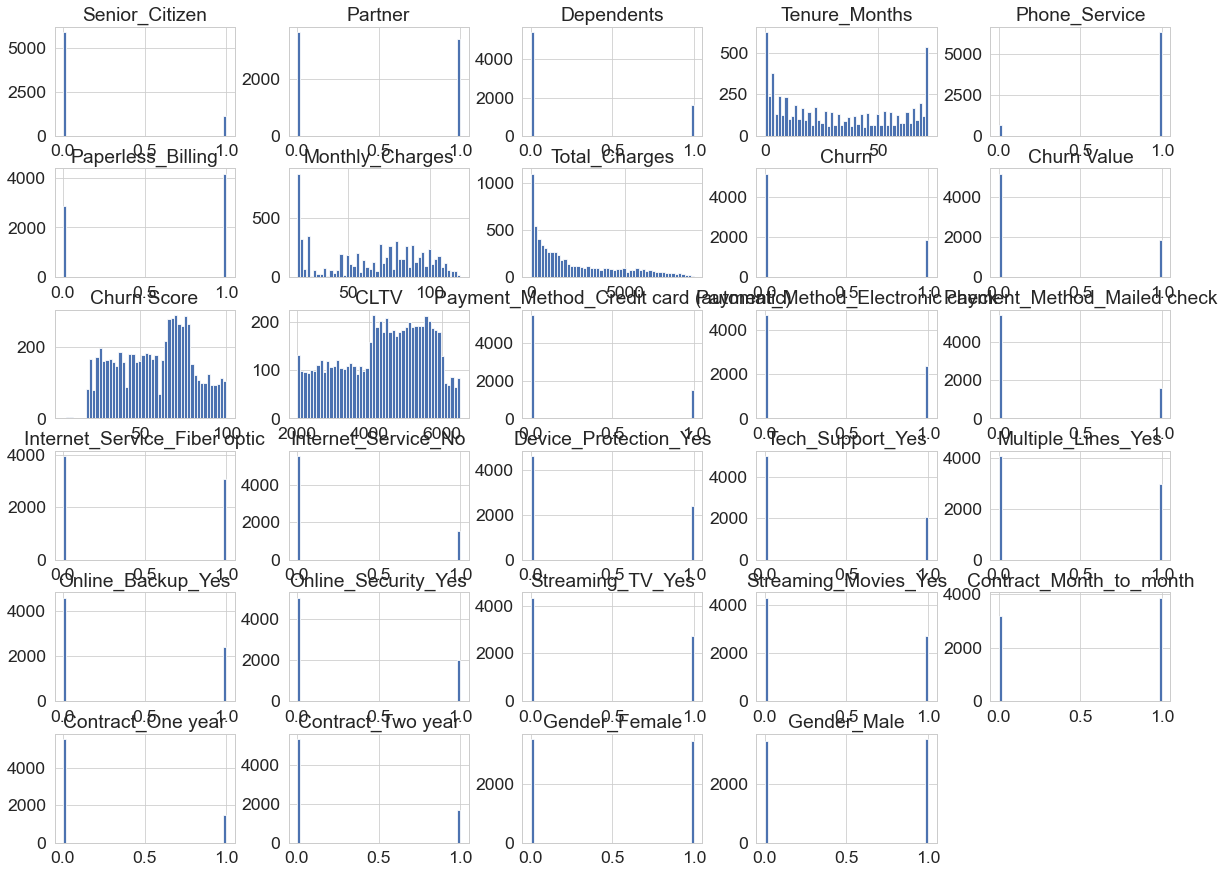

In [653]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# MODEL DEVELOPMENT

## CORRELATION MATRIX

In [654]:
df.corr()

,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Internet_Service_Fiber optic,Internet_Service_No,Device_Protection_Yes,Tech_Support_Yes,Multiple_Lines_Yes,Online_Backup_Yes,Online_Security_Yes,Streaming_TV_Yes,Streaming_Movies_Yes,Contract_Month_to_month,Contract_One year,Contract_Two year,Gender_Female,Gender_Male
Senior_Citizen,1.000000,0.016360,-0.174339,0.016993,0.009553,0.156133,0.220569,0.103468,0.150527,0.150527,0.101733,-0.003257,-0.023949,0.171441,-0.153402,0.255738,-0.182699,0.059913,-0.060430,0.142929,0.067065,-0.038306,0.105938,0.119445,0.138160,-0.046100,-0.116885,0.001226,-0.001226
Partner,0.016360,1.000000,0.363488,0.379711,0.017344,-0.014657,0.096600,0.317422,-0.150263,-0.150263,-0.110712,0.137658,0.081939,-0.083598,-0.095316,0.000039,0.000481,0.153406,0.119906,0.141360,0.141706,0.143353,0.124256,0.117575,-0.280849,0.082696,0.248084,0.001518,-0.001518
Dependents,-0.174339,0.363488,1.000000,0.131000,0.000515,-0.118956,-0.144194,0.030245,-0.248089,-0.248089,-0.174622,0.058207,0.041019,-0.140956,0.070819,-0.162237,0.171906,-0.022528,0.028521,-0.027608,0.003283,0.050251,-0.057953,-0.073301,-0.175157,0.014443,0.190049,-0.005072,0.005072
Tenure_Months,0.016993,0.379711,0.131000,1.000000,0.008287,0.006486,0.248196,0.826082,-0.351433,-0.351433,-0.224398,0.396687,0.232703,-0.207476,-0.234427,0.020233,-0.039513,0.360518,0.323892,0.332006,0.360335,0.327112,0.279506,0.286668,-0.645322,0.202259,0.558385,-0.004815,0.004815
Phone_Service,0.009553,0.017344,0.000515,0.008287,1.000000,0.016880,0.247103,0.113123,0.012300,0.012300,0.024649,0.022594,-0.007833,0.003350,-0.003431,0.289786,0.172244,-0.071544,-0.096553,0.279638,-0.052610,-0.093218,-0.022852,-0.032458,-0.000561,-0.002897,0.003408,0.006885,-0.006885
Paperless_Billing,0.156133,-0.014657,-0.118956,0.006486,0.016880,1.000000,0.352349,0.158937,0.191914,0.191914,0.129135,0.011393,-0.013528,0.208943,-0.205436,0.326886,-0.321112,0.104326,0.037984,0.163880,0.126673,-0.003178,0.224460,0.211278,0.169107,-0.051351,-0.147895,0.011526,-0.011526
Monthly_Charges,0.220569,0.096600,-0.144194,0.248196,0.247103,0.352349,1.000000,0.651529,0.193448,0.193448,0.133860,0.098543,0.030614,0.271758,-0.377499,0.787036,-0.763735,0.482780,0.338493,0.490400,0.441986,0.296971,0.629787,0.627883,0.060103,0.004959,-0.074646,0.014418,-0.014418
Total_Charges,0.103468,0.317422,0.030245,0.826082,0.113123,0.158937,0.651529,1.000000,-0.197527,-0.197527,-0.122854,0.342254,0.182643,-0.058395,-0.296230,0.362235,-0.375710,0.521928,0.431658,0.468595,0.509345,0.411675,0.514876,0.520755,-0.443940,0.170544,0.354257,0.000285,-0.000285
Churn,0.150527,-0.150263,-0.248089,-0.351433,0.012300,0.191914,0.193448,-0.197527,1.000000,1.000000,0.664681,-0.127531,-0.133731,0.300532,-0.091029,0.307880,-0.227440,-0.065729,-0.163989,0.040420,-0.081846,-0.171106,0.063960,0.061156,0.404439,-0.177320,-0.301852,0.008139,-0.008139
Churn Value,0.150527,-0.150263,-0.248089,-0.351433,0.012300,0.191914,0.193448,-0.197527,1.000000,1.000000,0.664681,-0.127531,-0.133731,0.300532,-0.091029,0.307880,-0.227440,-0.065729,-0.163989,0.040420,-0.081846,-0.171106,0.063960,0.061156,0.404439,-0.177320,-0.301852,0.008139,-0.008139


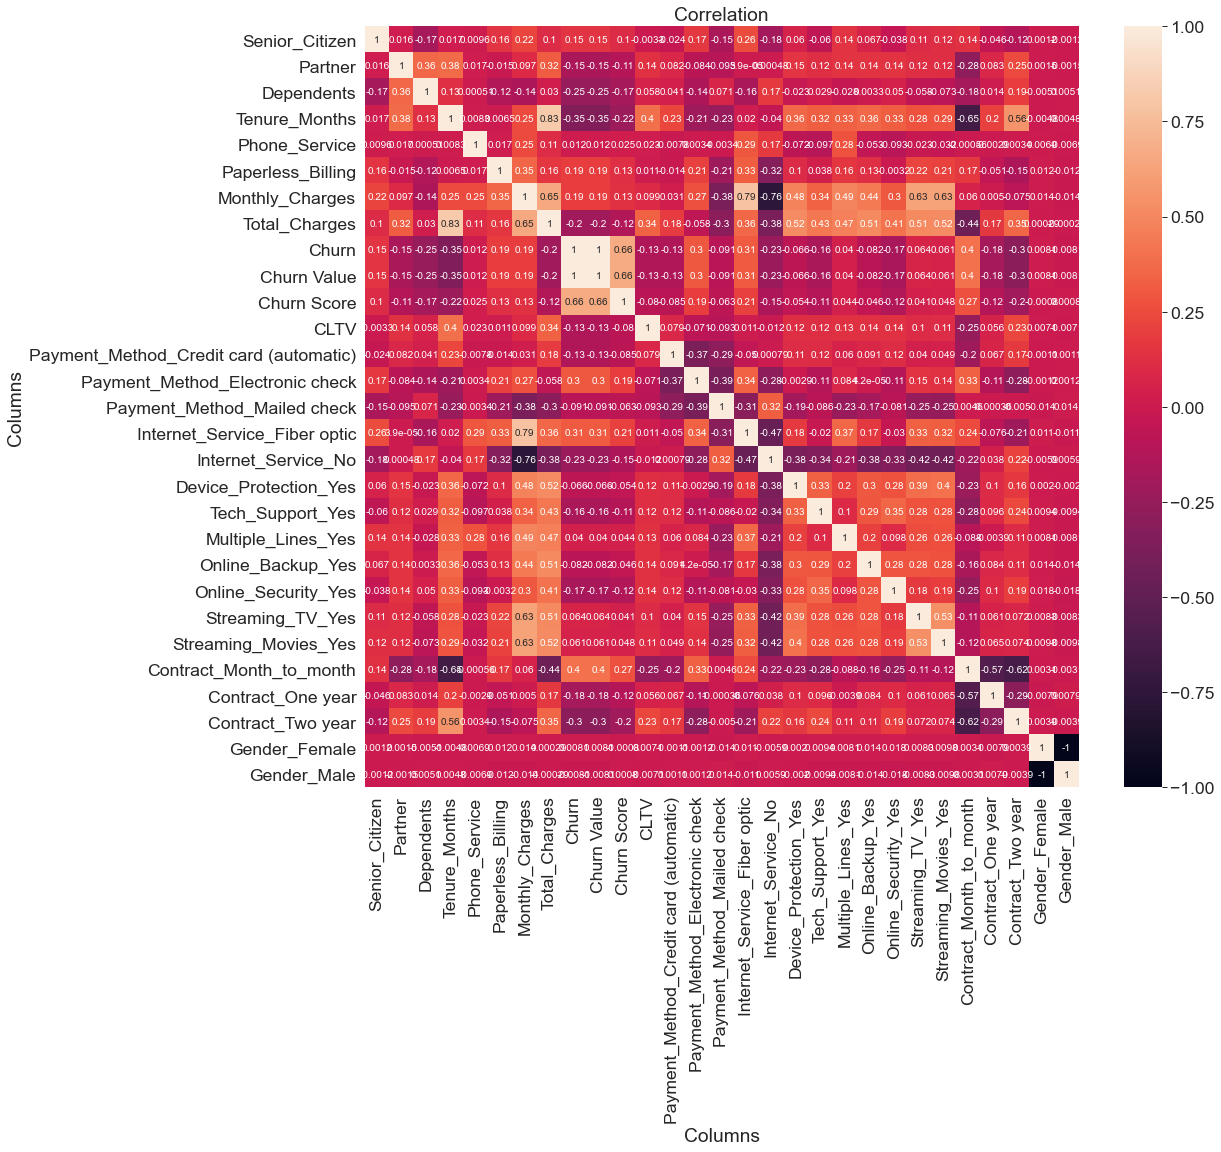

In [655]:
fig, ax = plt.subplots(figsize=(16,14)) 
sns.heatmap(df.corr(), annot=True, ax=ax).set(
    title = 'Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

In [656]:
from sklearn.preprocessing import LabelEncoder

In [657]:
corr_mat = df.corr(method = "pearson")
# Convert correlation matrix to 1-D Series and Sort
sorted_mat = corr_mat.unstack().sort_values()
print(sorted_mat)

Gender_Female                           Gender_Male                              -1.000000
Gender_Male                             Gender_Female                            -1.000000
Monthly_Charges                         Internet_Service_No                      -0.763735
Internet_Service_No                     Monthly_Charges                          -0.763735
Tenure_Months                           Contract_Month_to_month                  -0.645322
                                                                                    ...   
Streaming_Movies_Yes                    Streaming_Movies_Yes                      1.000000
Contract_Month_to_month                 Contract_Month_to_month                   1.000000
Contract_One year                       Contract_One year                         1.000000
Payment_Method_Credit card (automatic)  Payment_Method_Credit card (automatic)    1.000000
Gender_Male                             Gender_Male                               1.000000

In [658]:
corr_mat = df.corr(method = "pearson")

In [659]:
df.dtypes

CustomerID                                  object
Senior_Citizen                               int64
Partner                                      int64
Dependents                                   int64
Tenure_Months                                int64
Phone_Service                                int64
Contract                                    object
Paperless_Billing                            int64
Monthly_Charges                            float64
Total_Charges                              float32
Churn                                        int64
Churn Value                                  int64
Churn Score                                  int64
CLTV                                         int64
Churn Reason                                object
PPM_Factors                                 object
Tenure_Months_binned                      category
Payment_Method_Credit card (automatic)       uint8
Payment_Method_Electronic check              uint8
Payment_Method_Mailed check    

In [660]:
# Finding positive and negative correlations with the Response Variable in their order

dataset1 = df[['Senior_Citizen', 'Partner', 'Dependents',
       'Tenure_Months', 'Phone_Service', 'Paperless_Billing',
        'Monthly_Charges', 'Total_Charges', "Contract_Month_to_month", "Contract_Two year", "Online_Security_Yes", "Device_Protection_Yes","Payment_Method_Electronic check", 
        "Internet_Service_Fiber optic", "Internet_Service_No", "Tech_Support_Yes", "Streaming_TV_Yes", "Tenure_Months_binned", "Streaming_Movies_Yes"]]

correlations = dataset1.corrwith(df.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 Contract_Month_to_month            0.404439
Internet_Service_Fiber optic       0.307880
Payment_Method_Electronic check    0.300532
Monthly_Charges                    0.193448
Paperless_Billing                  0.191914
Senior_Citizen                     0.150527
Streaming_TV_Yes                   0.063960
Streaming_Movies_Yes               0.061156
Phone_Service                      0.012300
dtype: float64

Most Negative Correlations: 
 Device_Protection_Yes   -0.065729
Partner                 -0.150263
Tech_Support_Yes        -0.163989
Online_Security_Yes     -0.171106
Total_Charges           -0.197527
Internet_Service_No     -0.227440
Dependents              -0.248089
Contract_Two year       -0.301852
Tenure_Months           -0.351433
dtype: float64


In [661]:
dataset1.head()

,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,Contract_Month_to_month,Contract_Two year,Online_Security_Yes,Device_Protection_Yes,Payment_Method_Electronic check,Internet_Service_Fiber optic,Internet_Service_No,Tech_Support_Yes,Streaming_TV_Yes,Tenure_Months_binned,Streaming_Movies_Yes
0,0,0,0,2,1,1,53.85,108.150002,1,0,1,0,0,0,0,0,0,Short_Tenure,0
1,0,0,1,2,1,1,70.70,151.649994,1,0,0,0,1,1,0,0,0,Short_Tenure,0
2,0,0,1,8,1,1,99.65,820.500000,1,0,0,1,1,1,0,0,1,Short_Tenure,1
3,0,1,1,28,1,1,104.80,3046.050049,1,0,0,1,1,1,0,1,1,Medium_Tenure,1
4,0,0,1,49,1,1,103.70,5036.299805,1,0,0,1,0,1,0,0,1,Long_Tenure,1


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

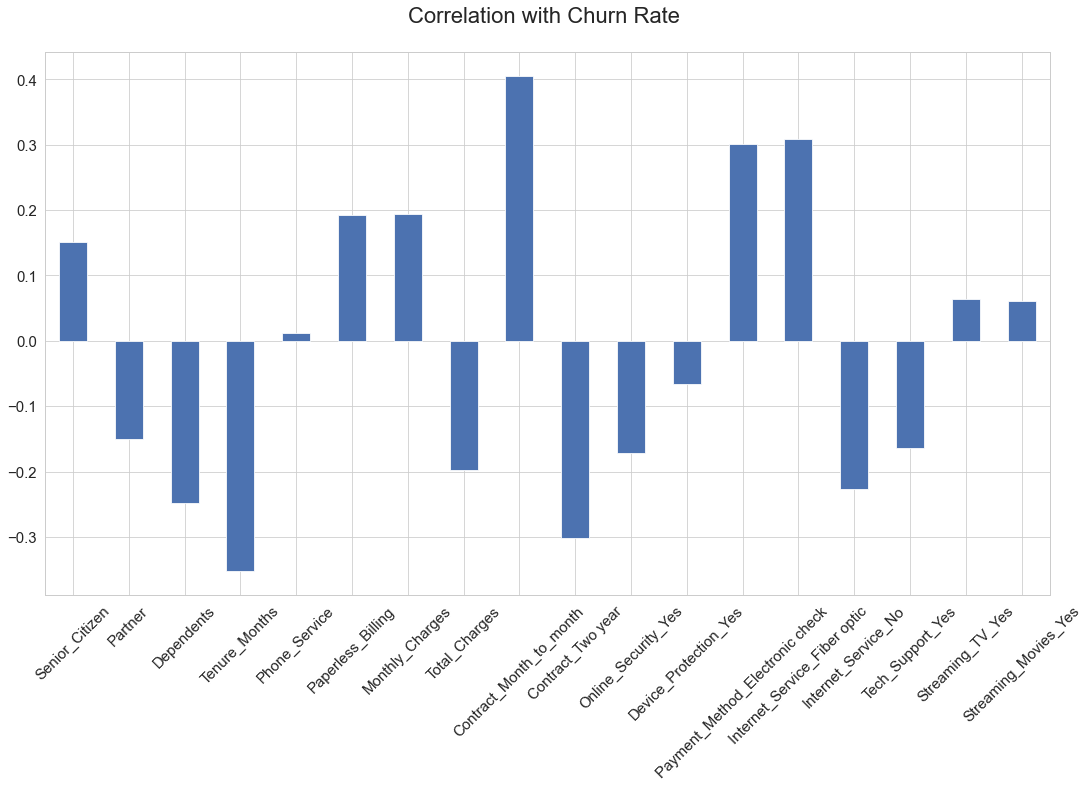

In [662]:
# Plot positive & negative correlation with Response Variable

correlations = dataset1.corrwith(df.Churn)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (18, 10), fontsize = 15, color = 'b',
    
        rot = 45, grid = True)

plt.title('Correlation with Churn Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

# LOGISTIC REGRESSION

## A Graph for Logistic Regression is depicted as below;

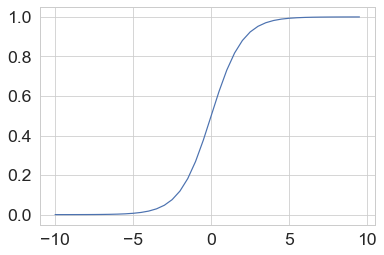

In [663]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
    y = []
    for val in x:
        y.append(1/(1+np.exp(-val)))
    return y                      # Y axis values are generated using sigmoid function and returned in an array
    
import matplotlib.pyplot as plt
import numpy as np
    
x = np.arange (-10., 10., 0.5) # depicting Y values running between -10 and +10 at intervals of 0.5
y = sigmoid(x)
plt.plot(x,y) # Graph using matplotlib.pyplot
plt.show()

In [664]:
#Splitting the data into train and test
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

In [665]:
# Building a Classification Model, the column Churn is our Target Variable 
# while the remaining columns are our Independent variables/features


## Creating a list named X_features and store the names of all independent variabes under this name

In [666]:
# X = dataset.drop(['Churn','customerID'], axis=1)

In [667]:
# X Features
X_features = list(df.columns)
X_features = df.drop(["Contract", "Churn", "Churn Reason", "Tenure_Months_binned", "Churn Score", "Churn Value"], axis =1)
X_features.head() 

,CustomerID,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,CLTV,PPM_Factors,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Internet_Service_Fiber optic,Internet_Service_No,Device_Protection_Yes,Tech_Support_Yes,Multiple_Lines_Yes,Online_Backup_Yes,Online_Security_Yes,Streaming_TV_Yes,Streaming_Movies_Yes,Contract_Month_to_month,Contract_One year,Contract_Two year,Gender_Female,Gender_Male
0,3668-QPYBK,0,0,0,2,1,1,53.85,108.150002,3239,Pull Factors,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1
1,9237-HQITU,0,0,1,2,1,1,70.70,151.649994,2701,Mooring Factors,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,9305-CDSKC,0,0,1,8,1,1,99.65,820.500000,5372,Mooring Factors,0,1,0,1,0,1,0,1,0,0,1,1,1,0,0,1,0
3,7892-POOKP,0,1,1,28,1,1,104.80,3046.050049,5003,Mooring Factors,0,1,0,1,0,1,1,1,0,0,1,1,1,0,0,1,0
4,0280-XJGEX,0,0,1,49,1,1,103.70,5036.299805,5340,Pull Factors,0,0,0,1,0,1,0,1,1,0,1,1,1,0,0,0,1


In [668]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7037 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CustomerID                              7037 non-null   object 
 1   Senior_Citizen                          7037 non-null   int64  
 2   Partner                                 7037 non-null   int64  
 3   Dependents                              7037 non-null   int64  
 4   Tenure_Months                           7037 non-null   int64  
 5   Phone_Service                           7037 non-null   int64  
 6   Paperless_Billing                       7037 non-null   int64  
 7   Monthly_Charges                         7037 non-null   float64
 8   Total_Charges                           7037 non-null   float32
 9   CLTV                                    7037 non-null   int64  
 10  PPM_Factors                             1863 non-null   obje

In [669]:
## Assigning the Target Variable Churn
y= df['Churn']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

After setting X features and Target Variable Y, statsmodel api provides Logit() Method to build Logistic Regresion Model.
Add new column and fix its value to 1 for the model to estimate the intercept

## In Logistic Regression, the regression parameters (feature coefficients/weights), are estimated using Maximum Likelihood Estimation (MLE)

In [670]:
from scipy import stats
import numpy as np
import pandas as pd 
import collections
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [671]:
#import statsmodels.api as sm

y = df.Churn
X = sm.add_constant(X_features)

## Splitting Dataset into Training and Test Sets

Before building the model, split the dataset into 70:30 to creating training and validation datasets
Thus the model will be built using the training set and tested using the test set

In [672]:
# conda update scikit-learn

In [673]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,
                                                     y, 
                                                     test_size = 0.3,
                                                     random_state = 150)
#to resolve any class imbalance - use stratify parameter.

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

In [674]:
train_identity = X_train['CustomerID']
X_train = X_train.drop(columns = ['CustomerID'])

test_identity = X_test['CustomerID']
X_test = X_test.drop(columns = ['CustomerID'])

In [675]:
train_identity1 = X_train['PPM_Factors']
X_train = X_train.drop(columns = ['PPM_Factors'])

test_identity1 = X_test['PPM_Factors']
X_test = X_test.drop(columns = ['PPM_Factors'])

X_train and y_train contains the independent variables and response variables values for the training dataset respectively
Similarly;
X_test and y_test contain the independent variables and response variable values for the test dataset, respectively

## Feature Scaling through Standardization

The method subtracts the mean value (standardized values have a mean of zero), and divide by the Std Deviation so that
the resulting distribution has unit variance

Scikit_Learn provides a transformer called StandardScaler for Strandardization

In [676]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [677]:
X_train[['Monthly_Charges', 'Total_Charges','CLTV']] = scaler.fit_transform(X_train[['Monthly_Charges','Total_Charges','CLTV']])

X_train.head()

,const,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Paperless_Billing,Monthly_Charges,Total_Charges,CLTV,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Internet_Service_Fiber optic,Internet_Service_No,Device_Protection_Yes,Tech_Support_Yes,Multiple_Lines_Yes,Online_Backup_Yes,Online_Security_Yes,Streaming_TV_Yes,Streaming_Movies_Yes,Contract_Month_to_month,Contract_One year,Contract_Two year,Gender_Female,Gender_Male
872,1.0,1,0,0,5,1,1,0.606514,-0.801232,-1.598204,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
3088,1.0,0,0,0,53,1,0,0.861511,1.167280,0.712076,0,1,0,1,0,1,0,1,1,1,0,0,1,0,0,1,0
5271,1.0,0,0,0,55,1,1,0.428183,0.904300,1.755210,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1
5432,1.0,0,0,0,39,0,0,-0.795138,-0.294934,-0.666653,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
2362,1.0,0,1,0,37,1,0,-1.486797,-0.690559,-1.123130,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


# Building Logistic Regression Model

In [678]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.400858
         Iterations 14


# Printing Model Summary

In [679]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                             Results: Logit
========================================================================================================
Model:                            Logit                         Pseudo R-squared:              0.313    
Dependent Variable:               Churn                         AIC:                           3998.4491
Date:                             2022-03-13 23:47              BIC:                           4161.0011
No. Observations:                 4925                          Log-Likelihood:                -1974.2  
Df Model:                         24                            LL-Null:                       -2871.8  
Df Residuals:                     4900                          LLR p-value:                   0.0000   
Converged:                        1.0000                        Scale:                         1.0000   
No. Iterations:                   14.0000                                                               
--------------------------------------------------------------------------------------------------------
                                        Coef.    Std.Err.      z     P>|z|      [0.025         0.975]   
--------------------------------------------------------------------------------------------------------
const                                   0.1733          nan      nan    nan            nan           nan
Senior_Citizen                          0.0594       0.1013   0.5865 0.5575        -0.1392        0.2580
Partner                                 0.3495       0.0904   3.8648 0.0001         0.1723        0.5268
Dependents                             -1.5024       0.1413 -10.6315 0.0000        -1.7793       -1.2254
Tenure_Months                          -0.0595       0.0078  -7.6295 0.0000        -0.0748       -0.0442
Phone_Service                          -0.7253       0.7875  -0.9211 0.3570        -2.2687        0.8181
Paperless_Billing                       0.2962       0.0907   3.2645 0.0011         0.1184        0.4740
Monthly_Charges                         0.0641       1.1564   0.0554 0.9558        -2.2025        2.3307
Total_Charges                           0.6732       0.2009   3.3501 0.0008         0.2793        1.0670
CLTV                                   -0.0327       0.0409  -0.7988 0.4244        -0.1129        0.0475
Payment_Method_Credit card (automatic) -0.0229       0.1388  -0.1651 0.8688        -0.2950        0.2492
Payment_Method_Electronic check         0.3079       0.1159   2.6560 0.0079         0.0807        0.5352
Payment_Method_Mailed check            -0.0683       0.1400  -0.4883 0.6254        -0.3426        0.2060
Internet_Service_Fiber optic            0.6644       0.9674   0.6867 0.4923        -1.2318        2.5605
Internet_Service_No                    -0.7539       0.9809  -0.7686 0.4421        -2.6763        1.1685
Device_Protection_Yes                  -0.1152       0.2140  -0.5384 0.5903        -0.5346        0.3042
Tech_Support_Yes                       -0.3662       0.2193  -1.6694 0.0950        -0.7961        0.0637
Multiple_Lines_Yes                      0.2092       0.2146   0.9749 0.3296        -0.2114        0.6298
Online_Backup_Yes                      -0.1405       0.2117  -0.6635 0.5070        -0.5555        0.2745
Online_Security_Yes                    -0.3786       0.2174  -1.7413 0.0816        -0.8047        0.0475
Streaming_TV_Yes                        0.3193       0.3950   0.8085 0.4188        -0.4548        1.0934
Streaming_Movies_Yes                    0.0797       0.3971   0.2007 0.8410        -0.6986        0.8580
Contract_Month_to_month                 0.8123 5448787.7145   0.0000 1.0000 -10679426.8675 10679428.4921
Contract_One year                       0.1410 4332625.0041   0.0000 1.0000  -8491788.8255  8491789.1076
Contract_Two year                      -0.7800 5058610.5121  -0.0000 1.0000  -9914695.1956  9914693.6356
Gender

In [680]:
## https://journals.sagepub.com/doi/full/10.1177/0049124116638107 to explain Pseudo R 
## squared. Good fit model between .2 to .4

# Model Diagnostics

1.Chi-Square test to check the statistical significance of individual explanatory variables. Equivalent to t-test in MLR

2.Likelihood ratio for checking the statistical siginificance of the overall model 
(LLR p-values) -used for feature selection too

3.Psuedo R^2: Measure of goodness of the model - termed Pseudo R^2 as it does not carry same interpretation as R^2 in MLR model

In [681]:
def get_siginificant_vars (lm):
    # Store the p-values and corresponding column names in a dataframe
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df["vars"] = var_p_vals_df.index
    var_p_vals_df.columns = ["pvals", "vars"]
    # Filter the column names where p-values is less than 0.05
    return list (var_p_vals_df[var_p_vals_df.pvals <=0.05]["vars"])

Pasing the above method get_siginificant_vars() and passing the logit_model produces the list of significant variables

In [682]:
significant_vars = get_siginificant_vars (logit_model)
significant_vars

['Partner',
 'Dependents',
 'Tenure_Months',
 'Paperless_Billing',
 'Total_Charges',
 'Payment_Method_Electronic check']

# BUILDING LOGISTIC REGRESSION USING SIGNIFICANT VARIABLES ONLY

## Fitting the Model on the Train set

In [683]:
final_logit = sm.Logit(y_train,
              sm.add_constant(X_train [significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.435590
         Iterations 7


In [684]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:                    Logit                Pseudo R-squared:     0.253      
Dependent Variable:       Churn                AIC:                  4304.5649  
Date:                     2022-03-13 23:47     BIC:                  4350.0795  
No. Observations:         4925                 Log-Likelihood:       -2145.3    
Df Model:                 6                    LL-Null:              -2871.8    
Df Residuals:             4918                 LLR p-value:          7.9171e-311
Converged:                1.0000               Scale:                1.0000     
No. Iterations:           7.0000                                                
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------
const                            0.9762   0.1806   5.4051 0.0000  0.6222  1.3301
Partner                          0.3592   0.0860   4.1762 0.0000  0.1906  0.5278
Dependents                      -1.7052   0.1362 -12.5178 0.0000 -1.9722 -1.4382
Tenure_Months                   -0.0963   0.0061 -15.8295 0.0000 -0.1083 -0.0844
Paperless_Billing                0.6849   0.0840   8.1490 0.0000  0.5201  0.8496
Total_Charges                    1.4127   0.1352  10.4521 0.0000  1.1478  1.6777
Payment_Method_Electronic check  0.7976   0.0768  10.3904 0.0000  0.6471  0.9480
================================================================================

"""

The negative sign in coefficeint value indicates that as the value of this variable increases, 
the probability of being a Churner decreases, that is, P(Y=1) decreases.

A positive sign means that the probability of being a Churner increases as the corresponding value of the variable increases

# Predicting using Trained Data

Using the final logit model and the siginificant features to predict the class probability. 
The predict() method will assign probabilities to each customer in the data set.

The actual predicted class and predicted probabilities in a dataframe will be used to compare and determine accuracy measures

In [685]:
y_pred_df= pd.DataFrame({"Actual_Class": y_train,
                         "Predicted_Probability": final_logit.predict(
                         sm.add_constant( X_train[significant_vars]))})

Printing the predictions of few observations at random

In [686]:
y_pred_df.sample(10, random_state = 42)

,Actual_Class,Predicted_Probability
2598,0,0.194910
580,1,0.556559
4228,0,0.336760
504,1,0.122799
212,1,0.252136
1823,1,0.765240
2318,0,0.338283
101,1,0.189209
3365,0,0.549687
3589,0,0.483515


In [687]:
y_pred_df.tail()

,Actual_Class,Predicted_Probability
496,1,0.377238
25,1,0.087864
3585,0,0.071812
2496,0,0.191163
5354,0,0.161730


## Understanding how many observations the model has classified correctly:

Use cu-off point probability of 0.5
thus all P(y)>= 0.5 predicted as Churner
All P(y)<=0.5 predicted as otherwise

In [688]:
y_pred_df["Predicted_Class"] = y_pred_df.Predicted_Probability.map(
                         lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(15, random_state = 42)

,Actual_Class,Predicted_Probability,Predicted_Class
2598,0,0.194910,0
580,1,0.556559,1
4228,0,0.336760,0
504,1,0.122799,0
212,1,0.252136,0
1823,1,0.765240,1
2318,0,0.338283,0
101,1,0.189209,0
3365,0,0.549687,1
3589,0,0.483515,0


In [689]:
y_pred_df.head()

,Actual_Class,Predicted_Probability,Predicted_Class
872,1,0.511831,1
3088,0,0.156619,0
5271,0,0.086230,0
5432,0,0.039239,0
2362,0,0.038975,0


In [690]:
df.head(3)

,CustomerID,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Churn,Churn Value,Churn Score,CLTV,Churn Reason,PPM_Factors,Tenure_Months_binned,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Internet_Service_Fiber optic,Internet_Service_No,Device_Protection_Yes,Tech_Support_Yes,Multiple_Lines_Yes,Online_Backup_Yes,Online_Security_Yes,Streaming_TV_Yes,Streaming_Movies_Yes,Contract_Month_to_month,Contract_One year,Contract_Two year,Gender_Female,Gender_Male
0,3668-QPYBK,0,0,0,2,1,Month_to_month,1,53.85,108.150002,1,1,86,3239,Competitor made better offer,Pull Factors,Short_Tenure,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1
1,9237-HQITU,0,0,1,2,1,Month_to_month,1,70.70,151.649994,1,1,67,2701,Moved,Mooring Factors,Short_Tenure,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,9305-CDSKC,0,0,1,8,1,Month_to_month,1,99.65,820.500000,1,1,86,5372,Moved,Mooring Factors,Short_Tenure,0,1,0,1,0,1,0,1,0,0,1,1,1,0,0,1,0


## Append the CustomerID to the DataFrame and call for the PPM_factors too to ascertain responsible factors leading to Churn

In [691]:
final_results = pd.concat([train_identity, train_identity1, y_pred_df], axis = 1).dropna()

print (final_results)

      CustomerID      PPM_Factors  Actual_Class  Predicted_Probability  \
872   6015-VVHHE     Push Factors             1               0.511831   
952   7579-OOPEC     Push Factors             1               0.451421   
925   8914-RBTSB  Mooring Factors             1               0.404553   
979   6771-XWBDM     Push Factors             1               0.231298   
1009  2656-TABEH     Push Factors             1               0.783200   
...          ...              ...           ...                    ...   
1298  3217-FZDMN     Push Factors             1               0.485703   
1774  8676-TRMJS     Push Factors             1               0.356160   
1169  3018-TFTSU     Push Factors             1               0.258156   
496   4193-ORFCL     Push Factors             1               0.377238   
25    0486-HECZI     Push Factors             1               0.087864   

      Predicted_Class  
872                 1  
952                 0  
925                 0  
979            

In [697]:
final_results.head(5)

,CustomerID,Actual_Class,Predicted_Probability,Predicted_Class,PPM_Factors
590,7181-BQYBV,1,0.798348,1,Push Factors
886,5178-LMXOP,1,0.797611,1,Push Factors
991,0684-AOSIH,1,0.797601,1,Push Factors
692,2725-KXXWT,1,0.797174,1,Push Factors
1610,8775-LHDJH,1,0.797159,1,Mooring Factors


In [698]:
final_results.sort_values (by = ["Predicted_Probability"], inplace=True, ascending= False)

In [699]:
final_results.iloc[500:700]

,CustomerID,Actual_Class,Predicted_Probability,Predicted_Class,PPM_Factors
580,5931-FLJJF,1,0.556559,1,Push Factors
1745,0023-XUOPT,1,0.556440,1,Mooring Factors
561,0925-VYDLG,1,0.556252,1,Push Factors
391,9809-IMGCQ,1,0.555826,1,Pull Factors
271,1271-SJBGZ,1,0.554969,1,Pull Factors
...,...,...,...,...,...
1660,3223-WZWJM,1,0.486321,0,Pull Factors
34,4080-OGPJL,1,0.486032,0,Mooring Factors
1298,3217-FZDMN,1,0.485703,0,Push Factors
1697,2079-FBMZK,1,0.483457,0,Pull Factors


In [700]:
final_results = final_results[["CustomerID", "Actual_Class", "Predicted_Probability","Predicted_Class", "PPM_Factors"]]

In [701]:
final_results.tail(10)

,CustomerID,Actual_Class,Predicted_Probability,Predicted_Class,PPM_Factors
1541,7136-RVDTZ,1,0.024935,0,Push Factors
1217,2091-MJTFX,1,0.024150,0,Push Factors
1367,3034-ZBEQN,1,0.024095,0,Push Factors
1121,1043-YCUTE,1,0.018713,0,Push Factors
794,1322-AGOQM,1,0.017858,0,Push Factors
718,4139-SUGLD,1,0.016365,0,Push Factors
108,9063-ZGTUY,1,0.010653,0,Mooring Factors
1254,6532-YLWSI,1,0.010507,0,Push Factors
1437,1114-CENIM,1,0.008713,0,Mooring Factors
65,6323-AYBRX,1,0.004346,0,Push Factors


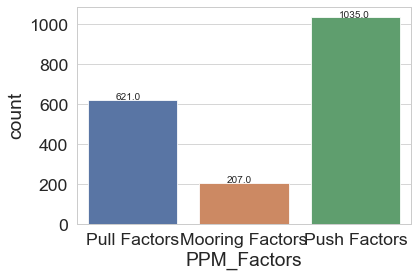

PPM_Factors distribution

Push Factors       77.878
Pull Factors       46.727
Mooring Factors    15.576
Name: PPM_Factors, dtype: float64


In [702]:
ax = sns.countplot(x = "PPM_Factors", data = df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03))

plt.show()
print("PPM_Factors distribution\n")
print(round(df["PPM_Factors"].value_counts()/final_results.shape[0]*100,3))

In [703]:
final_results.to_csv("Final_Logistic.csv")

# PREDICTING USING TEST SET    

In [467]:
#y_pred_df_test = pd.DataFrame({"Actual_Class": y_test,
                         "Predicted_Probability_test": final_logit.predict(
                         #sm.add_constant( X_test[significant_vars]))})

In [469]:
#y_pred_df_test.sample(5, random_state = 42)

,Actual_Class,Predicted_Probability_test
4118,0,1.0
4993,0,1.0
2620,0,1.0
3915,0,1.0
1031,1,1.0


In [470]:
#y_pred_df_test["Predicted_Class"] = y_pred_df_test.Predicted_Probability_test.map(
                         lambda x: 1 if x > 0.5 else 0)
#y_pred_df_test.sample(20, random_state = 42)

,Actual_Class,Predicted_Probability_test,Predicted_Class
4118,0,1.0,1
4993,0,1.0,1
2620,0,1.0,1
3915,0,1.0,1
1031,1,1.0,1
5657,0,1.0,1
5224,0,1.0,1
1187,1,1.0,1
6979,0,1.0,1
1668,1,1.0,1


The LR Model correctly classified the customers in some instances and misclassifed in some
To measure that, use Confusion Matrix also known as Error Matrix or Classification Table

# Confusion Matrix

In [704]:
# Checking the actual and predicted values of observations in the dataset
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Sklearn.metric module is used to build a confusion matrix; 

Plotting it as a map using a method draw_cm()

In [705]:
from sklearn import metrics
def draw_cm(Actual, Predicted):
    ## Cret
    cm = metrics.confusion_matrix (Actual, Predicted, [1,0] )
    sn.heatmap(cm, annot = True, fmt = ".2f",
    xticklabels = ["Churn", "Non-Churn"]),
    yticklabels = ["Churn", "Non-Churn"] 
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()  

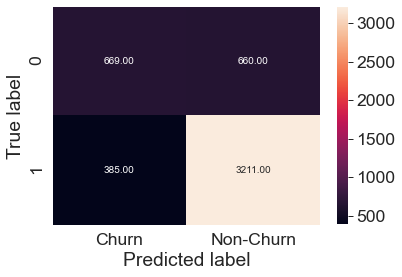

In [706]:
draw_cm (y_pred_df.Actual_Class,
        y_pred_df.Predicted_Class)

In [707]:
print (metrics.classification_report (y_pred_df.Actual_Class,
                                      y_pred_df.Predicted_Class))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      3596
           1       0.63      0.50      0.56      1329

    accuracy                           0.79      4925
   macro avg       0.73      0.70      0.71      4925
weighted avg       0.78      0.79      0.78      4925



Additional Notes:
Predict Feature Importance: 
Logistic Regression allows us to determine the key features that have significance in predicting the target attribute
(“Churn” in this project).
The logistic regression model predicts that the churn rate would increase positively 
with month to month contract, optic fibre internet service, electronic checks, 
absence of payment security and tech support.
On the other hand, the model predicts a negative correlation with churn if any customer has subscribed to online security, 
one-year contract or if they have opted for mailed checks as their payment medium.